
0: 448x640 1 bed, 110.6ms
Speed: 4.0ms preprocess, 110.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)


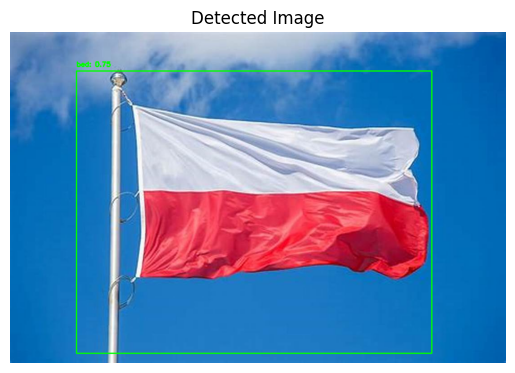

Detection results:
Class: bed, Confidence: 0.75, BBox: (147, 86, 935, 712)


In [40]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO('yolov8s.pt')  # You can choose the specific version/model size

# Load the input image
image_path = 'prob3_img1.jpg'
image = cv2.imread(image_path)

# Convert the image to RGB (YOLO expects RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform object detection
results = model(image_rgb)

# Draw bounding boxes and labels on the image
def draw_boxes(image, results):
    for result in results[0].boxes:
        x1, y1, x2, y2 = result.xyxy[0].tolist()
        conf = result.conf[0]
        cls = result.cls[0]
        label = f"{model.names[int(cls)]}: {conf:.2f}"
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    return image

# Draw the results on the original image
detected_image = draw_boxes(image_rgb.copy(), results)

# Save the result image in BGR format for viewing in external applications
output_image_path = 'output_prob3_img1.jpg'
cv2.imwrite(output_image_path, cv2.cvtColor(detected_image, cv2.COLOR_RGB2BGR))

# Use matplotlib to display the image in RGB format
plt.imshow(detected_image)
plt.axis('off')  # Hide the axes
plt.title('Detected Image')
plt.show()

# Print detection results
print("Detection results:")
for result in results[0].boxes:
    x1, y1, x2, y2 = result.xyxy[0].tolist()
    conf = result.conf[0]
    cls = result.cls[0]
    print(f"Class: {model.names[int(cls)]}, Confidence: {conf:.2f}, BBox: ({int(x1)}, {int(y1)}, {int(x2)}, {int(y2)})")
